# CUSTOMER CHURN ANALYSIS

Customer Churn is also known as Customer Attrition. Cutomer Churn is the loss of clients or customers. Telephone service companies, Intrnet service providers, pay TV companies,Insurance firm often used Customer Churn Analysis. Customer churn is one of their key business metric because the cost of retaining an existing customer is far less than acquiring a new one.
Companies from these sectors often have customer service branches which attempt to win back defecting clients,because recovered long-term customers can be worth much more to a company than newly recruited clients.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

##### In given dataset we have 7043 rows and 21 columns.

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### About the columns

##### CustomerID - Unique ID of customer.

##### Gender - This shows whether the customer is female or male.

##### SeniorCitizen - This column shows customer is senior citizen or not.

##### Dependents - Customer's have dependents or not.

##### Tenure - Number of months the customer has stayed with company.

##### PhoneService - Whether the customer have phone service or not.

##### MultipleLines - Whether the customer has Multiple lines or not.

##### InternetService - This column shows that Which internet service the customer have.

##### OnlineSecurity - Whether the customer has online security or not.

##### OnlineBackup - This column shows that, customer have online backup or not.

##### DeviceProtection - Whther the customer has Device protection or not.

##### TechSupport - This shows that whether the customer has tech support or not.

##### StreamingTV - Whether the customer have streaming TV or not.

##### StreamingMovies - This column shows that has customer streaming movies or not.

##### Contract - Which type of contract the customer have.

##### PaperlessBilling - Whether the customer doing paperless billing or not.

##### PaymentMethod - This column shows that which payment method the customer used.

##### MonthlyCharges - Monthly amount charged to the customer.

##### TotalCharges - Amount of total charges to the customer.

##### Churn - Whether the customer is churn or not.

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### There is no null value in given dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### We can see the information about the dataset which includes the datatypes of column,number of rows and columns and the total memory used by the dataset.

In [7]:
df.drop(['customerID'],axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##### We deleted the customer ID column because it has not much effect on dataset.

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


##### Firstly we seen that Total charges is object type and we converted the object type data into float. Now we have null values in Total Charges column.

In [10]:
ds = df[df.TotalCharges!=' ']
ds.shape

(7032, 20)

In [11]:
ds.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
ds.TotalCharges = pd.to_numeric(ds.TotalCharges)

In [13]:
ds.TotalCharges.dtypes

dtype('float64')

In [14]:
ds

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
ds.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


##### Now this is new dataset information with 7032 rows and 20 columns and there is no null values anymore in dataset.

### Data Analysis and Visualization

<AxesSubplot:xlabel='Churn', ylabel='count'>

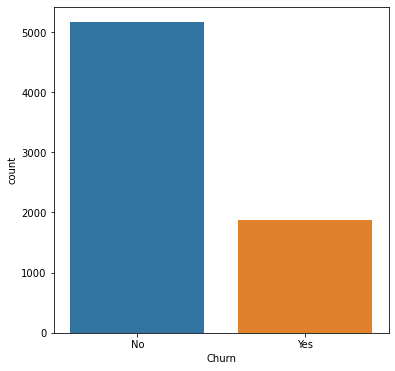

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Churn',data=ds)

##### From above plot we can see that , the number customers who are not churn are higher than the  customer  who are churn. 

<AxesSubplot:xlabel='gender', ylabel='count'>

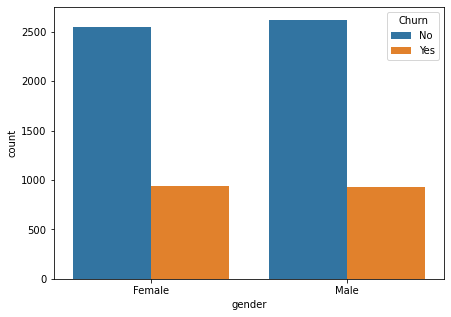

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'gender',hue = 'Churn',data=ds)

##### From above plot we can say that, churn rate for both male and female ia almost equal.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

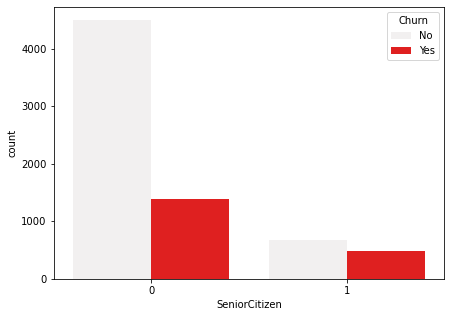

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'SeniorCitizen',hue='Churn',data=ds,color='r')

##### Churn rate for senior citizen is less than the youngers.

<AxesSubplot:xlabel='Partner', ylabel='count'>

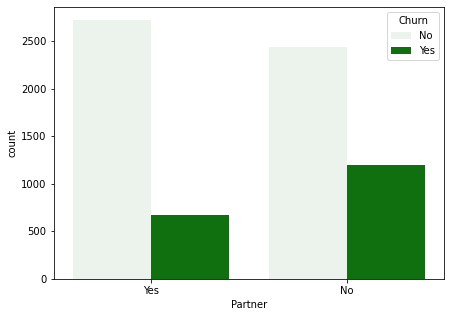

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'Partner',hue='Churn',data=ds,color='g')

##### From above plot we can see that , the percentage of Churn is higher for the customers who have no partners than the customers who have partners.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

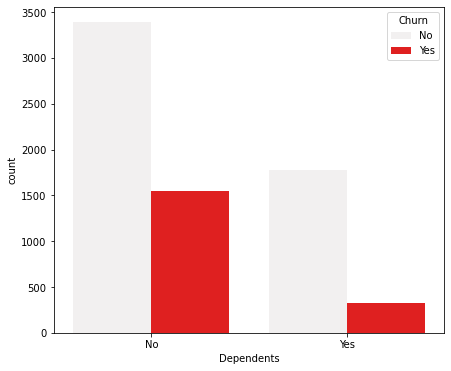

In [21]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'Dependents',hue='Churn',data=ds,color='r')

##### Churn percentage of customers who have no dependents is higher than the customers who have dependents.

<AxesSubplot:xlabel='tenure', ylabel='count'>

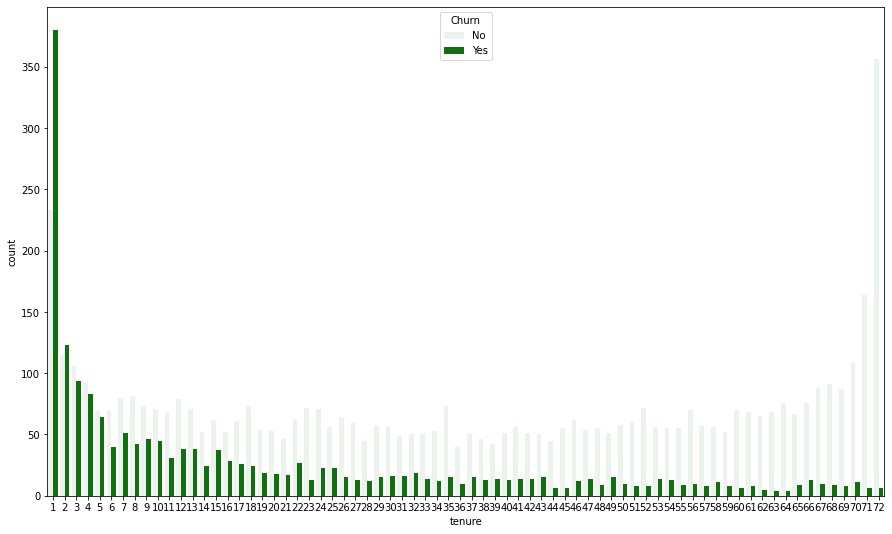

In [22]:
plt.figure(figsize=(15,9))
sns.countplot(x = 'tenure',hue='Churn',data=ds,color='g')

##### From above plot we can see that, low number of tenure has chances to churn more means low tenure,highest is the chance of churn.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

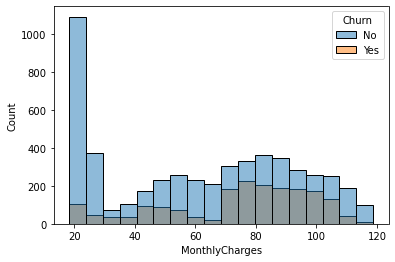

In [23]:
sns.histplot(x = 'MonthlyCharges',hue='Churn',data=ds)

##### From above plot we can see that, churn rate is higher than the no churn rate in monthlhy charges. 

<AxesSubplot:xlabel='Contract', ylabel='count'>

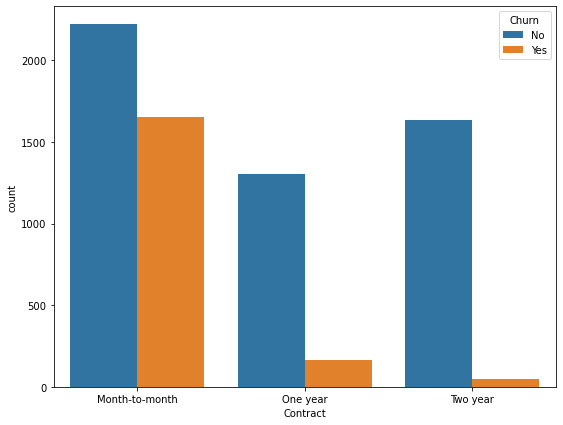

In [24]:
plt.figure(figsize=(9,7))
sns.countplot(x = 'Contract',hue='Churn',data=ds)

##### From the above plot we can see that percentage of churn is higher in month to month contract than the other contract.

### Description

In [25]:
ds.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


##### The description of dataset shows the Count,Standard Deviation,Mean value,Maximum value and Minimum value of a column

<AxesSubplot:>

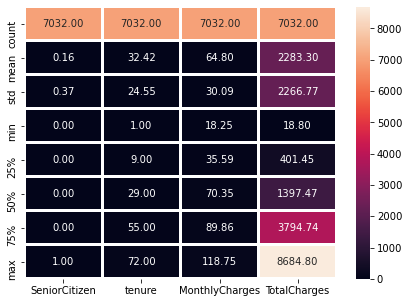

In [26]:
plt.figure(figsize=(7,5))
sns.heatmap(ds.describe(),annot=True,fmt='.2f',linewidths=2)

### Outcome of Description

##### Description of CHURN dataset helps us to clean the data.

Tenure - 1.Mean = 32.42, 2.Std = 24.55, 3.Min = 1, Max = 72

Monthly Charges - 1.Mean = 64.80, 2.Std = 30.09, 3.Min = 18.25, Max = 118.75

Total Charges - 1.Mean = 2283.30, 2.Std = 2266.77, 3.Min = 18.80, Max = 8648.80

In [27]:
ds.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<AxesSubplot:>

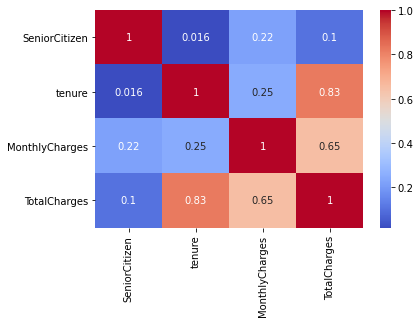

In [28]:
sns.heatmap(ds.corr(),annot=True,cmap='coolwarm')

##### From the above plot we can see that all the columns are positively correlated with other. Tenure and Total chargesd are 83 percent correlated with each other which consider to be a strong bond.  Total Chrages and Monthly Charges are 65 percent correlated with other which consider to be a good bond. 
##### Monthly Charges and Tenure are 25 percent correlated with each other.

In [29]:
cat_columns = []
for i in ds.dtypes.index:
    if ds[i].dtypes == 'object':
        cat_columns.append(i)
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [30]:
non_cat_columns = []
for i in ds.dtypes.index:
    if ds[i].dtypes != 'object':
        non_cat_columns.append(i)
non_cat_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

## Data Cleaning

### Skewness

In [31]:
ds.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

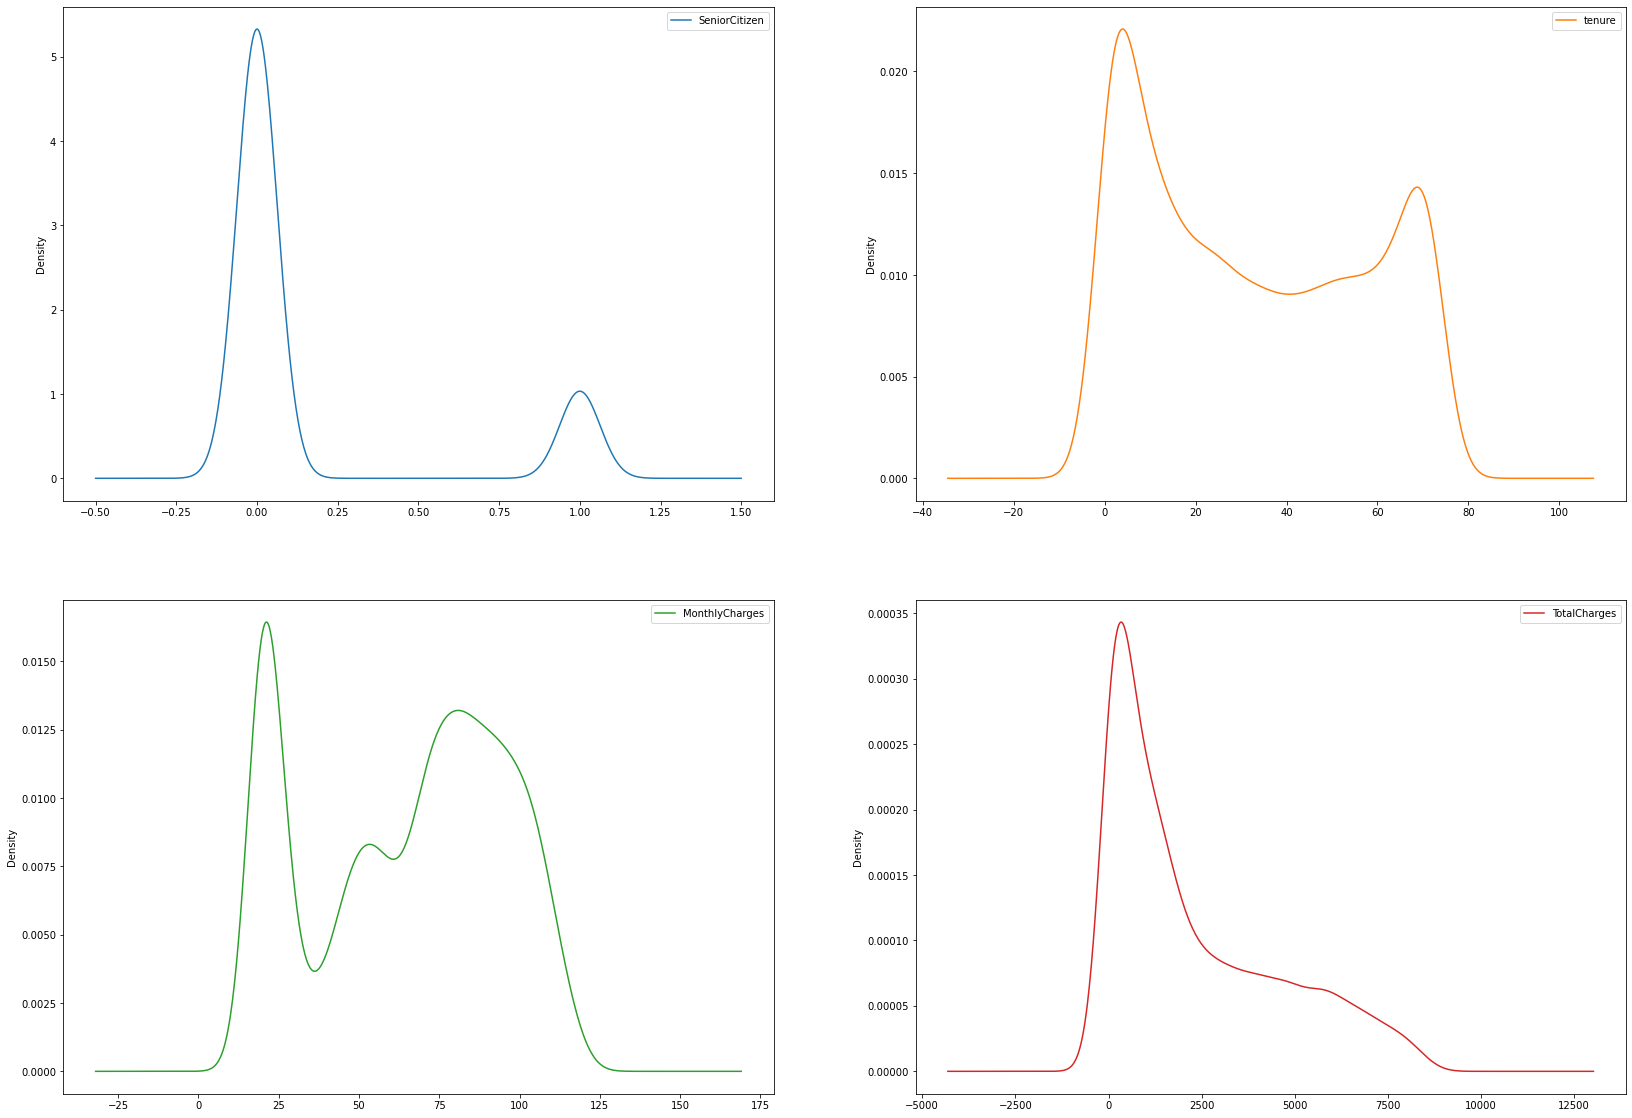

In [32]:
ds.plot(kind = 'density',subplots = True, layout = (2,2), figsize=(28,20), sharex=False)
plt.show()

##### We can see the skewness in dataset for 4 columns.

In [33]:
ds.skew().sort_values(ascending=False)

SeniorCitizen     1.831103
TotalCharges      0.961642
tenure            0.237731
MonthlyCharges   -0.222103
dtype: float64

### Data Conversion

In [34]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()

In [35]:
for i in ds.columns:
    if ds[i].dtypes == object:
        ds[i] = lec.fit_transform(ds[i].values.reshape(-1,1))

In [36]:
ds

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


### Checling Outliers

In [37]:
ds_cat_columns = ds[cat_columns]
ds_cat_columns

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [38]:
ds_non_cat_columns = ds[non_cat_columns]
ds_non_cat_columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


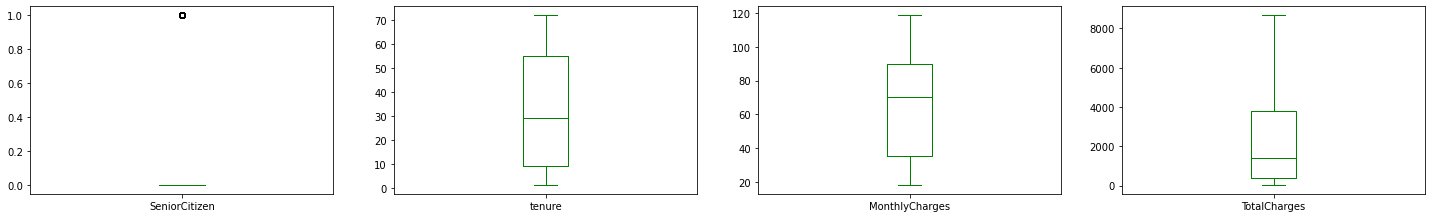

In [39]:
ds_non_cat_columns.plot(kind = 'box',subplots=True,layout=(5,4),figsize=(25,20),sharex=True,color='g')
plt.show()

##### We can see outliers present only in Senior citizen column.

### Removing Outliers

#### Z Score Technique

In [40]:
from scipy.stats import zscore

z = np.abs(zscore(ds))
z.shape

(7032, 20)

In [41]:
ds = ds[(z<3).all(axis=1)]
ds.shape

(6352, 20)

### Percentage Data Loss

In [42]:
percentage_data_loss = (7032-6352)/7032*100
percentage_data_loss

9.670079635949943

### Checking VIF

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return(vif.sort_values(by='VIF_Values',ascending = False))

In [45]:
calculate_vif(ds_non_cat_columns)

,Features,VIF_Values
3,TotalCharges,8.085198
1,tenure,6.332737
2,MonthlyCharges,3.701617
0,SeniorCitizen,1.257569


##### We can see that all the values are within the threshold.

### Splitting the dataset in dsx and dsy

In [46]:
dsx = ds.drop('Churn',axis=1)
dsx.shape

(6352, 19)

In [47]:
dsy = ds['Churn']
dsy.shape

(6352,)

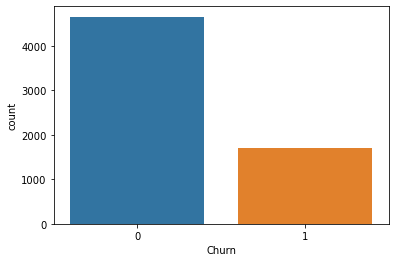

In [48]:
sns.countplot(dsy)
plt.show()

##### From above plot we can see that data is imbalanced, we have to balanced the data.

### SMOTE

In [49]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x,y = sm.fit_resample(dsx,dsy)

In [50]:
x.shape

(9306, 19)

<AxesSubplot:xlabel='Churn', ylabel='count'>

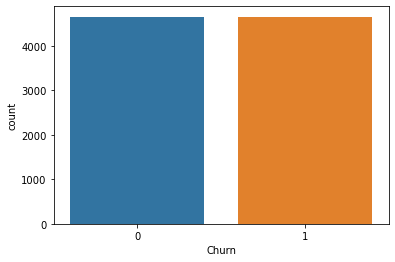

In [51]:
sns.countplot(y)

##### Now the dataset is balanced.

### Removing Skewness

In [52]:
x.skew().sort_values(ascending=False)

SeniorCitizen       2.123588
Dependents          1.381336
Contract            1.152642
TotalCharges        1.045880
OnlineSecurity      0.796423
TechSupport         0.780611
tenure              0.500801
Partner             0.497013
OnlineBackup        0.457063
DeviceProtection    0.441645
gender              0.283973
MultipleLines       0.168523
StreamingTV         0.110419
StreamingMovies     0.103775
InternetService     0.067179
PhoneService        0.000000
PaymentMethod      -0.199487
PaperlessBilling   -0.413071
MonthlyCharges     -0.638189
dtype: float64

In [53]:
from sklearn.preprocessing import power_transform

In [54]:
x1 = power_transform(x)

In [55]:
type(x1)

numpy.ndarray

In [56]:
x = pd.DataFrame(x1,columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.151990,-0.396816,-0.781939,-0.524708,0.532687,0.0,-0.955662,-1.472714,1.415135,-0.970539,1.277374,-0.844491,-1.117769,-1.119336,1.300440,-1.227601,1.460330,-0.608834,0.353129
1,1.151990,-0.396816,-0.781939,-0.524708,-1.351599,0.0,-0.955662,-1.472714,1.415135,1.282076,-0.978993,-0.844491,-1.117769,-1.119336,-0.691966,0.814597,1.460330,-0.713820,-1.295150
2,-0.868063,-0.396816,-0.781939,-0.524708,-1.351599,0.0,-0.955662,0.138942,-0.837110,-0.970539,-0.978993,-0.844491,-1.117769,-1.119336,-0.691966,0.814597,0.453515,-0.112904,-1.149576
3,-0.868063,-0.396816,-0.781939,-0.524708,-0.673812,0.0,1.093320,0.138942,-0.837110,-0.970539,1.277374,-0.844491,1.136493,1.132619,-0.691966,0.814597,0.453515,1.074970,-0.237032
4,1.151990,-0.396816,-0.781939,1.905821,0.106938,0.0,1.093320,0.138942,-0.837110,1.282076,-0.978993,-0.844491,1.136493,-1.119336,-0.691966,0.814597,-0.549344,0.621140,0.377339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9301,1.151990,-0.396816,-0.781939,-0.524708,-0.332956,0.0,1.093320,0.138942,-0.837110,-0.970539,-0.978993,-0.844491,1.136493,1.132619,-0.691966,-1.227601,0.453515,0.886646,0.038171
9302,-0.868063,-0.396816,1.278872,-0.524708,1.342860,0.0,1.093320,0.138942,0.940388,1.282076,1.277374,0.923957,-1.117769,-1.119336,1.300440,-1.227601,-1.546142,0.896987,1.460554
9303,1.151990,-0.396816,-0.781939,-0.524708,-1.551234,0.0,1.093320,0.138942,-0.837110,-0.970539,-0.978993,-0.844491,-1.117769,-1.119336,-0.691966,0.814597,0.453515,0.028883,-1.443906
9304,-0.868063,-0.396816,-0.781939,-0.524708,-0.524495,0.0,-0.955662,-1.472714,1.415135,-0.970539,-0.978993,-0.844491,-1.117769,-1.119336,-0.691966,-1.227601,-0.549344,-0.826936,-0.541618


In [57]:
x.skew()

gender              0.283973
SeniorCitizen       2.123588
Partner             0.497013
Dependents          1.381336
tenure             -0.164430
PhoneService        0.000000
MultipleLines       0.118654
InternetService    -0.082358
OnlineSecurity      0.404473
OnlineBackup        0.163112
DeviceProtection    0.150424
TechSupport         0.389299
StreamingTV        -0.049904
StreamingMovies    -0.053067
Contract            0.765589
PaperlessBilling   -0.413071
PaymentMethod      -0.192602
MonthlyCharges     -0.371534
TotalCharges       -0.131074
dtype: float64

In [58]:
x.drop(['SeniorCitizen','Dependents','PhoneService'],axis=1,inplace=True)

In [59]:
x

,gender,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.151990,-0.781939,0.532687,-0.955662,-1.472714,1.415135,-0.970539,1.277374,-0.844491,-1.117769,-1.119336,1.300440,-1.227601,1.460330,-0.608834,0.353129
1,1.151990,-0.781939,-1.351599,-0.955662,-1.472714,1.415135,1.282076,-0.978993,-0.844491,-1.117769,-1.119336,-0.691966,0.814597,1.460330,-0.713820,-1.295150
2,-0.868063,-0.781939,-1.351599,-0.955662,0.138942,-0.837110,-0.970539,-0.978993,-0.844491,-1.117769,-1.119336,-0.691966,0.814597,0.453515,-0.112904,-1.149576
3,-0.868063,-0.781939,-0.673812,1.093320,0.138942,-0.837110,-0.970539,1.277374,-0.844491,1.136493,1.132619,-0.691966,0.814597,0.453515,1.074970,-0.237032
4,1.151990,-0.781939,0.106938,1.093320,0.138942,-0.837110,1.282076,-0.978993,-0.844491,1.136493,-1.119336,-0.691966,0.814597,-0.549344,0.621140,0.377339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9301,1.151990,-0.781939,-0.332956,1.093320,0.138942,-0.837110,-0.970539,-0.978993,-0.844491,1.136493,1.132619,-0.691966,-1.227601,0.453515,0.886646,0.038171
9302,-0.868063,1.278872,1.342860,1.093320,0.138942,0.940388,1.282076,1.277374,0.923957,-1.117769,-1.119336,1.300440,-1.227601,-1.546142,0.896987,1.460554
9303,1.151990,-0.781939,-1.551234,1.093320,0.138942,-0.837110,-0.970539,-0.978993,-0.844491,-1.117769,-1.119336,-0.691966,0.814597,0.453515,0.028883,-1.443906
9304,-0.868063,-0.781939,-0.524495,-0.955662,-1.472714,1.415135,-0.970539,-0.978993,-0.844491,-1.117769,-1.119336,-0.691966,-1.227601,-0.549344,-0.826936,-0.541618


##### We drop the columns : Senior citizen, Dependents and Phone Service because after using power transformer its skewness still same. 

### Scaling the Model

In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dsx = sc.fit_transform(x)

In [61]:
x.shape

(9306, 16)

In [62]:
y.shape

(9306,)

### Training Process

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [64]:
lr = LogisticRegression()
lr

LogisticRegression()

### Best Random State

In [65]:
maxAccu = 0
maxRs = 0

for i in(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best Accuracy is',maxAccu,'for Random state',maxRs)

Best Accuracy is 0.7904727793696275 for Random state 1


In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [67]:
x_train.shape

(6514, 16)

In [68]:
x_test.shape

(2792, 16)

In [69]:
y_train.shape

(6514,)

In [70]:
y_test.shape

(2792,)

### Model Testing

In [71]:
def Model(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print('Accuracy',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    scr1 = cross_val_score(model,x,y,cv = 5)
    print('Cross Validation Score :',scr1.mean())

#### LogisticRegression

In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
Model(lr)


Accuracy 0.7904727793696275
[[1084  319]
 [ 266 1123]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1403
           1       0.78      0.81      0.79      1389

    accuracy                           0.79      2792
   macro avg       0.79      0.79      0.79      2792
weighted avg       0.79      0.79      0.79      2792

Cross Validation Score : 0.7855182786935866


#### Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
Model(rf)

Accuracy 0.8409742120343839
[[1189  214]
 [ 230 1159]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1403
           1       0.84      0.83      0.84      1389

    accuracy                           0.84      2792
   macro avg       0.84      0.84      0.84      2792
weighted avg       0.84      0.84      0.84      2792

Cross Validation Score : 0.8359234233584267


#### Service Vector Classifier

In [74]:
from sklearn.svm import SVC

sv = SVC()
Model(sv)

Accuracy 0.8162607449856734
[[1085  318]
 [ 195 1194]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1403
           1       0.79      0.86      0.82      1389

    accuracy                           0.82      2792
   macro avg       0.82      0.82      0.82      2792
weighted avg       0.82      0.82      0.82      2792

Cross Validation Score : 0.8064744074048636


#### AdaBoost Classifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier()
Model(ad)

Accuracy 0.8137535816618912
[[1096  307]
 [ 213 1176]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1403
           1       0.79      0.85      0.82      1389

    accuracy                           0.81      2792
   macro avg       0.82      0.81      0.81      2792
weighted avg       0.82      0.81      0.81      2792

Cross Validation Score : 0.8107731715101834


#### KNeighbours Classifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
Model(kn)

Accuracy 0.7754297994269341
[[1011  392]
 [ 235 1154]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1403
           1       0.75      0.83      0.79      1389

    accuracy                           0.78      2792
   macro avg       0.78      0.78      0.77      2792
weighted avg       0.78      0.78      0.77      2792

Cross Validation Score : 0.7810064233278367


#### Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
Model(dt)

Accuracy 0.7779369627507163
[[1098  305]
 [ 315 1074]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1403
           1       0.78      0.77      0.78      1389

    accuracy                           0.78      2792
   macro avg       0.78      0.78      0.78      2792
weighted avg       0.78      0.78      0.78      2792

Cross Validation Score : 0.7809032830021627


#### Extra Tree Classifier

In [78]:
from sklearn.tree import ExtraTreeClassifier

et = ExtraTreeClassifier()
Model(et)

Accuracy 0.7621776504297995
[[1083  320]
 [ 344 1045]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1403
           1       0.77      0.75      0.76      1389

    accuracy                           0.76      2792
   macro avg       0.76      0.76      0.76      2792
weighted avg       0.76      0.76      0.76      2792

Cross Validation Score : 0.7777871407620147


##### As we seen that Accuracy score for Random Forest Classifier is higher than other models but the cross validation for Random Forest is higher than its Accuracy. After doing Hyper Parameter Tuning we choose our Final Model.

### Hyper Parameter Tuning

#### Logistic Regression

In [79]:
LogisticRegression()

LogisticRegression()

In [80]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'max_iter' : [1,10,100,1000,10000],
             'multi_class' : ['auto', 'ovr', 'multinomial']}

In [81]:
GSC = GridSearchCV(LogisticRegression(),parameters,cv=5,scoring='accuracy')
GSC.fit(x_train,y_train)
GSC.best_params_

{'max_iter': 10, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}

In [82]:
GSC_pred = GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.792621776504298

#### Random Forest Classifier

In [83]:
RandomForestClassifier()

RandomForestClassifier()

In [84]:
parameters = {'criterion' : ["gini", "entropy"],
             'max_depth' : [2,4,6,8,10],
             'max_features' : ["auto", "sqrt", "log2"],
             'class_weight' : ["balanced", "balanced_subsample"]}

In [85]:
GSC = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GSC.fit(x_train,y_train)
GSC.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2'}

In [86]:
GSC_pred = GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.8305873925501432

#### AdaBoost Classifier

In [87]:
AdaBoostClassifier()

AdaBoostClassifier()

In [88]:
parameters = {'n_estimators' : [50],
             'algorithm' : ['SAMME', 'SAMME.R'],
             'random_state' : [1]}

In [89]:
GSC = GridSearchCV(AdaBoostClassifier(),parameters,cv=5,scoring='accuracy')
GSC.fit(x_train,y_train)
GSC.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 50, 'random_state': 1}

In [90]:
GSC_pred = GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.8137535816618912

##### From the model testing we seen that, the accuracy score with and without Hyper Parameter Tuning for all the Models are same. Accuracy score for Random Forest is higher than all the models but its cross validation score is more than its Accuracy score so we cant choose Random Forest Classifier.
##### We choose AdaBoost Classifier as our final Model.

### ROC AUC Plot

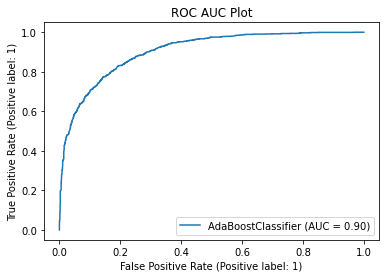

In [91]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GSC.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

### Saving the Model

In [92]:
import joblib
joblib.dump(GSC.best_estimator_,'CUSTOMER.pkl')

['CUSTOMER.pkl']